# Analysis of Speech Samples with Spectrograms

## Data Paths
- Clean Speech: `../data/vox1_test_segments/id10271/00001_seg_0.wav`
- Noisy Speech: `../data/noisy/gaussian/vox1_test_segments_snr_10_noisy_gaussian/id10271/00001_seg_0.wav` 
- Denoised Speech: `../data/metricgan/gaussian/vox1_test_segments_snr_10_noisy_gaussian/id10271/00001_seg_0.wav`

## Analysis Plan
1. Spectrogram Visualization
    - Generate high-resolution spectrograms for each audio sample
    - Compare temporal and frequency characteristics
    - Highlight key acoustic features

2. Difference Analysis
    - Calculate spectrogram differences between:
      - Clean vs Noisy
      - Clean vs Denoised
      - Noisy vs Denoised
    - Identify areas of noise reduction/artifacts

3. Quality Assessment
    - Evaluate frequency preservation
    - Analyze noise floor levels
    - Compare signal-to-noise ratios
    - Assess preservation of speech characteristics

MetricGAN+

In [14]:
figsize = (16, 20)

In [15]:
from IPython.display import Audio, display
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os

# Load audio files
clean_path = '../data/vox1_test_segments/id10271/00001_seg_0.wav'
noisy_path = '../data/noisy/gaussian/vox1_test_segments_snr_10_noisy_gaussian/id10271/00001_seg_0.wav'
denoised_path = '../data/metricgan/gaussian/vox1_test_segments_snr_10_noisy_gaussian/id10271/00001_seg_0.wav'

# Load and create Audio objects
print("Clean Speech:")
display(Audio(clean_path))

print("\nNoisy Speech:")
display(Audio(noisy_path))

print("\nDenoised Speech:")
display(Audio(denoised_path))

Clean Speech:



Noisy Speech:



Denoised Speech:


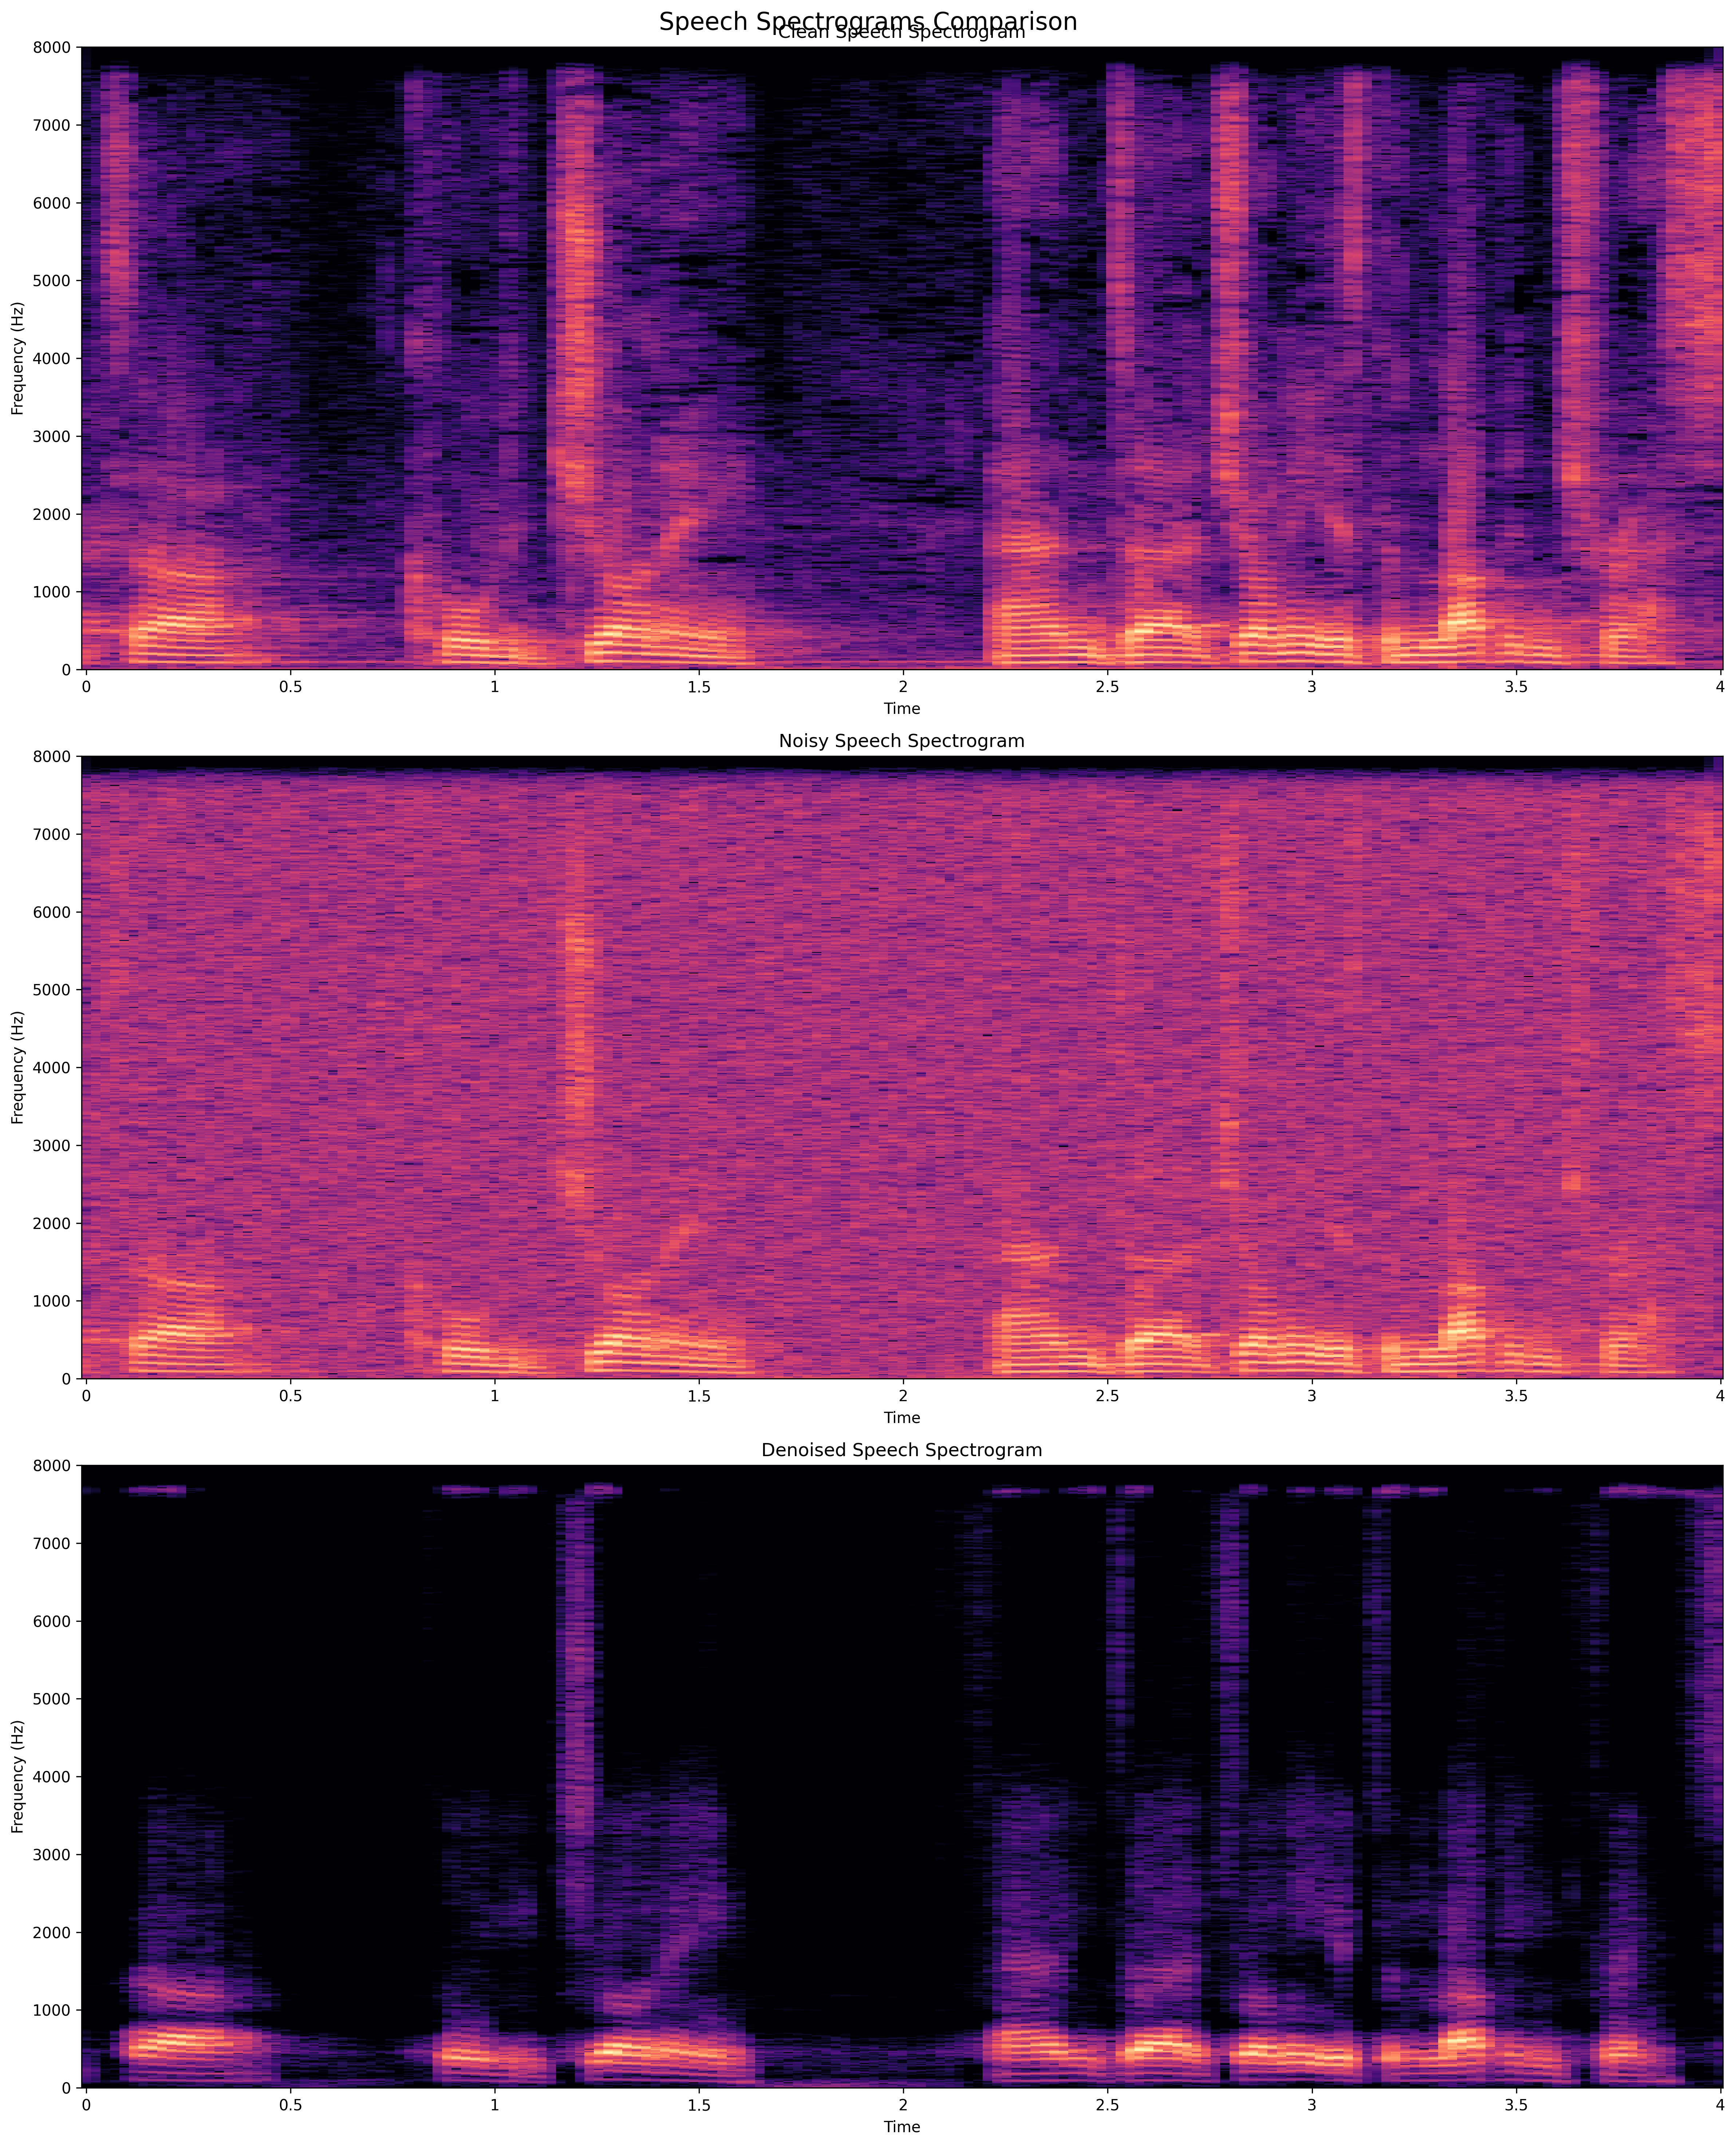

In [16]:
import numpy as np

import matplotlib.pyplot as plt
import librosa.display

# Load audio files and compute spectrograms
def create_spectrogram(audio_path):
    y, sr = librosa.load(audio_path)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    return D, sr

# Create spectrograms
fig, axes = plt.subplots(3, 1, figsize=figsize, dpi=300)
fig.suptitle('Speech Spectrograms Comparison', fontsize=16)

# Clean speech
D_clean, sr = create_spectrogram(clean_path)
img = librosa.display.specshow(D_clean, x_axis='time', y_axis='hz', sr=sr, ax=axes[0])
axes[0].set_title('Clean Speech Spectrogram')
axes[0].set_ylabel('Frequency (Hz)')
axes[0].set_ylim(0, 8000)  # Limit y-axis to 8000 Hz for better visibility

# Noisy speech
D_noisy, _ = create_spectrogram(noisy_path)
librosa.display.specshow(D_noisy, x_axis='time', y_axis='hz', sr=sr, ax=axes[1])
axes[1].set_title('Noisy Speech Spectrogram')
axes[1].set_ylabel('Frequency (Hz)')
axes[1].set_ylim(0, 8000)  # Limit y-axis to 8000 Hz for better visibility

# Denoised speech
D_denoised, _ = create_spectrogram(denoised_path)
librosa.display.specshow(D_denoised, x_axis='time', y_axis='hz', sr=sr, ax=axes[2])
axes[2].set_title('Denoised Speech Spectrogram')
axes[2].set_ylabel('Frequency (Hz)')
axes[2].set_ylim(0, 8000)

# Add colorbar
# plt.colorbar(img, ax=axes, format='%+2.0f dB')
plt.tight_layout()

In [17]:
# Create spectrograms
fig, axes = plt.subplots(4, 1, figsize=figsize, dpi=300)

# Clean speech
img = librosa.display.specshow(D_clean, x_axis="time", y_axis="log", sr=sr, ax=axes[0])
axes[0].set_title("Clean Speech Spectrogram")
axes[0].set_ylabel("Frequency (Hz)")

# Noisy speech
librosa.display.specshow(D_noisy, x_axis="time", y_axis="log", sr=sr, ax=axes[1])
axes[1].set_title("Noisy Speech Spectrogram")
axes[1].set_ylabel("Frequency (Hz)")

# Denoised speech
librosa.display.specshow(D_denoised, x_axis="time", y_axis="log", sr=sr, ax=axes[2])
axes[2].set_title("Denoised Speech Spectrogram")
axes[2].set_ylabel("Frequency (Hz)")

# Difference between clean and denoised
difference = D_clean - D_denoised
librosa.display.specshow(difference, x_axis="time", y_axis="log", sr=sr, ax=axes[3], cmap="inferno")
axes[3].set_title("Difference (Clean - Denoised)")
axes[3].set_ylabel("Frequency (Hz)")

plt.tight_layout()
# save to ../figures/metricgan_spectrograms.png
file_path = '../figures/metricgan_spectrograms.png'
os.makedirs(os.path.dirname(file_path), exist_ok=True)
plt.savefig(file_path, bbox_inches="tight")
plt.close()

DeepFilterNet3

In [18]:
from IPython.display import Audio, display
import librosa

# Load audio files
clean_path = "../data/vox1_test_segments/id10271/00001_seg_0.wav"
noisy_path = "../data/noisy/gaussian/vox1_test_segments_snr_10_noisy_gaussian/id10271/00001_seg_0.wav"
denoised_path = "../data/deepfilternet3/gaussian/vox1_test_segments_snr_10_noisy_gaussian/id10271/00001_seg_0.wav"

# Load and create Audio objects
print("Clean Speech:")
display(Audio(clean_path))

print("\nNoisy Speech:")
display(Audio(noisy_path))

print("\nDenoised Speech:")
display(Audio(denoised_path))

Clean Speech:



Noisy Speech:



Denoised Speech:


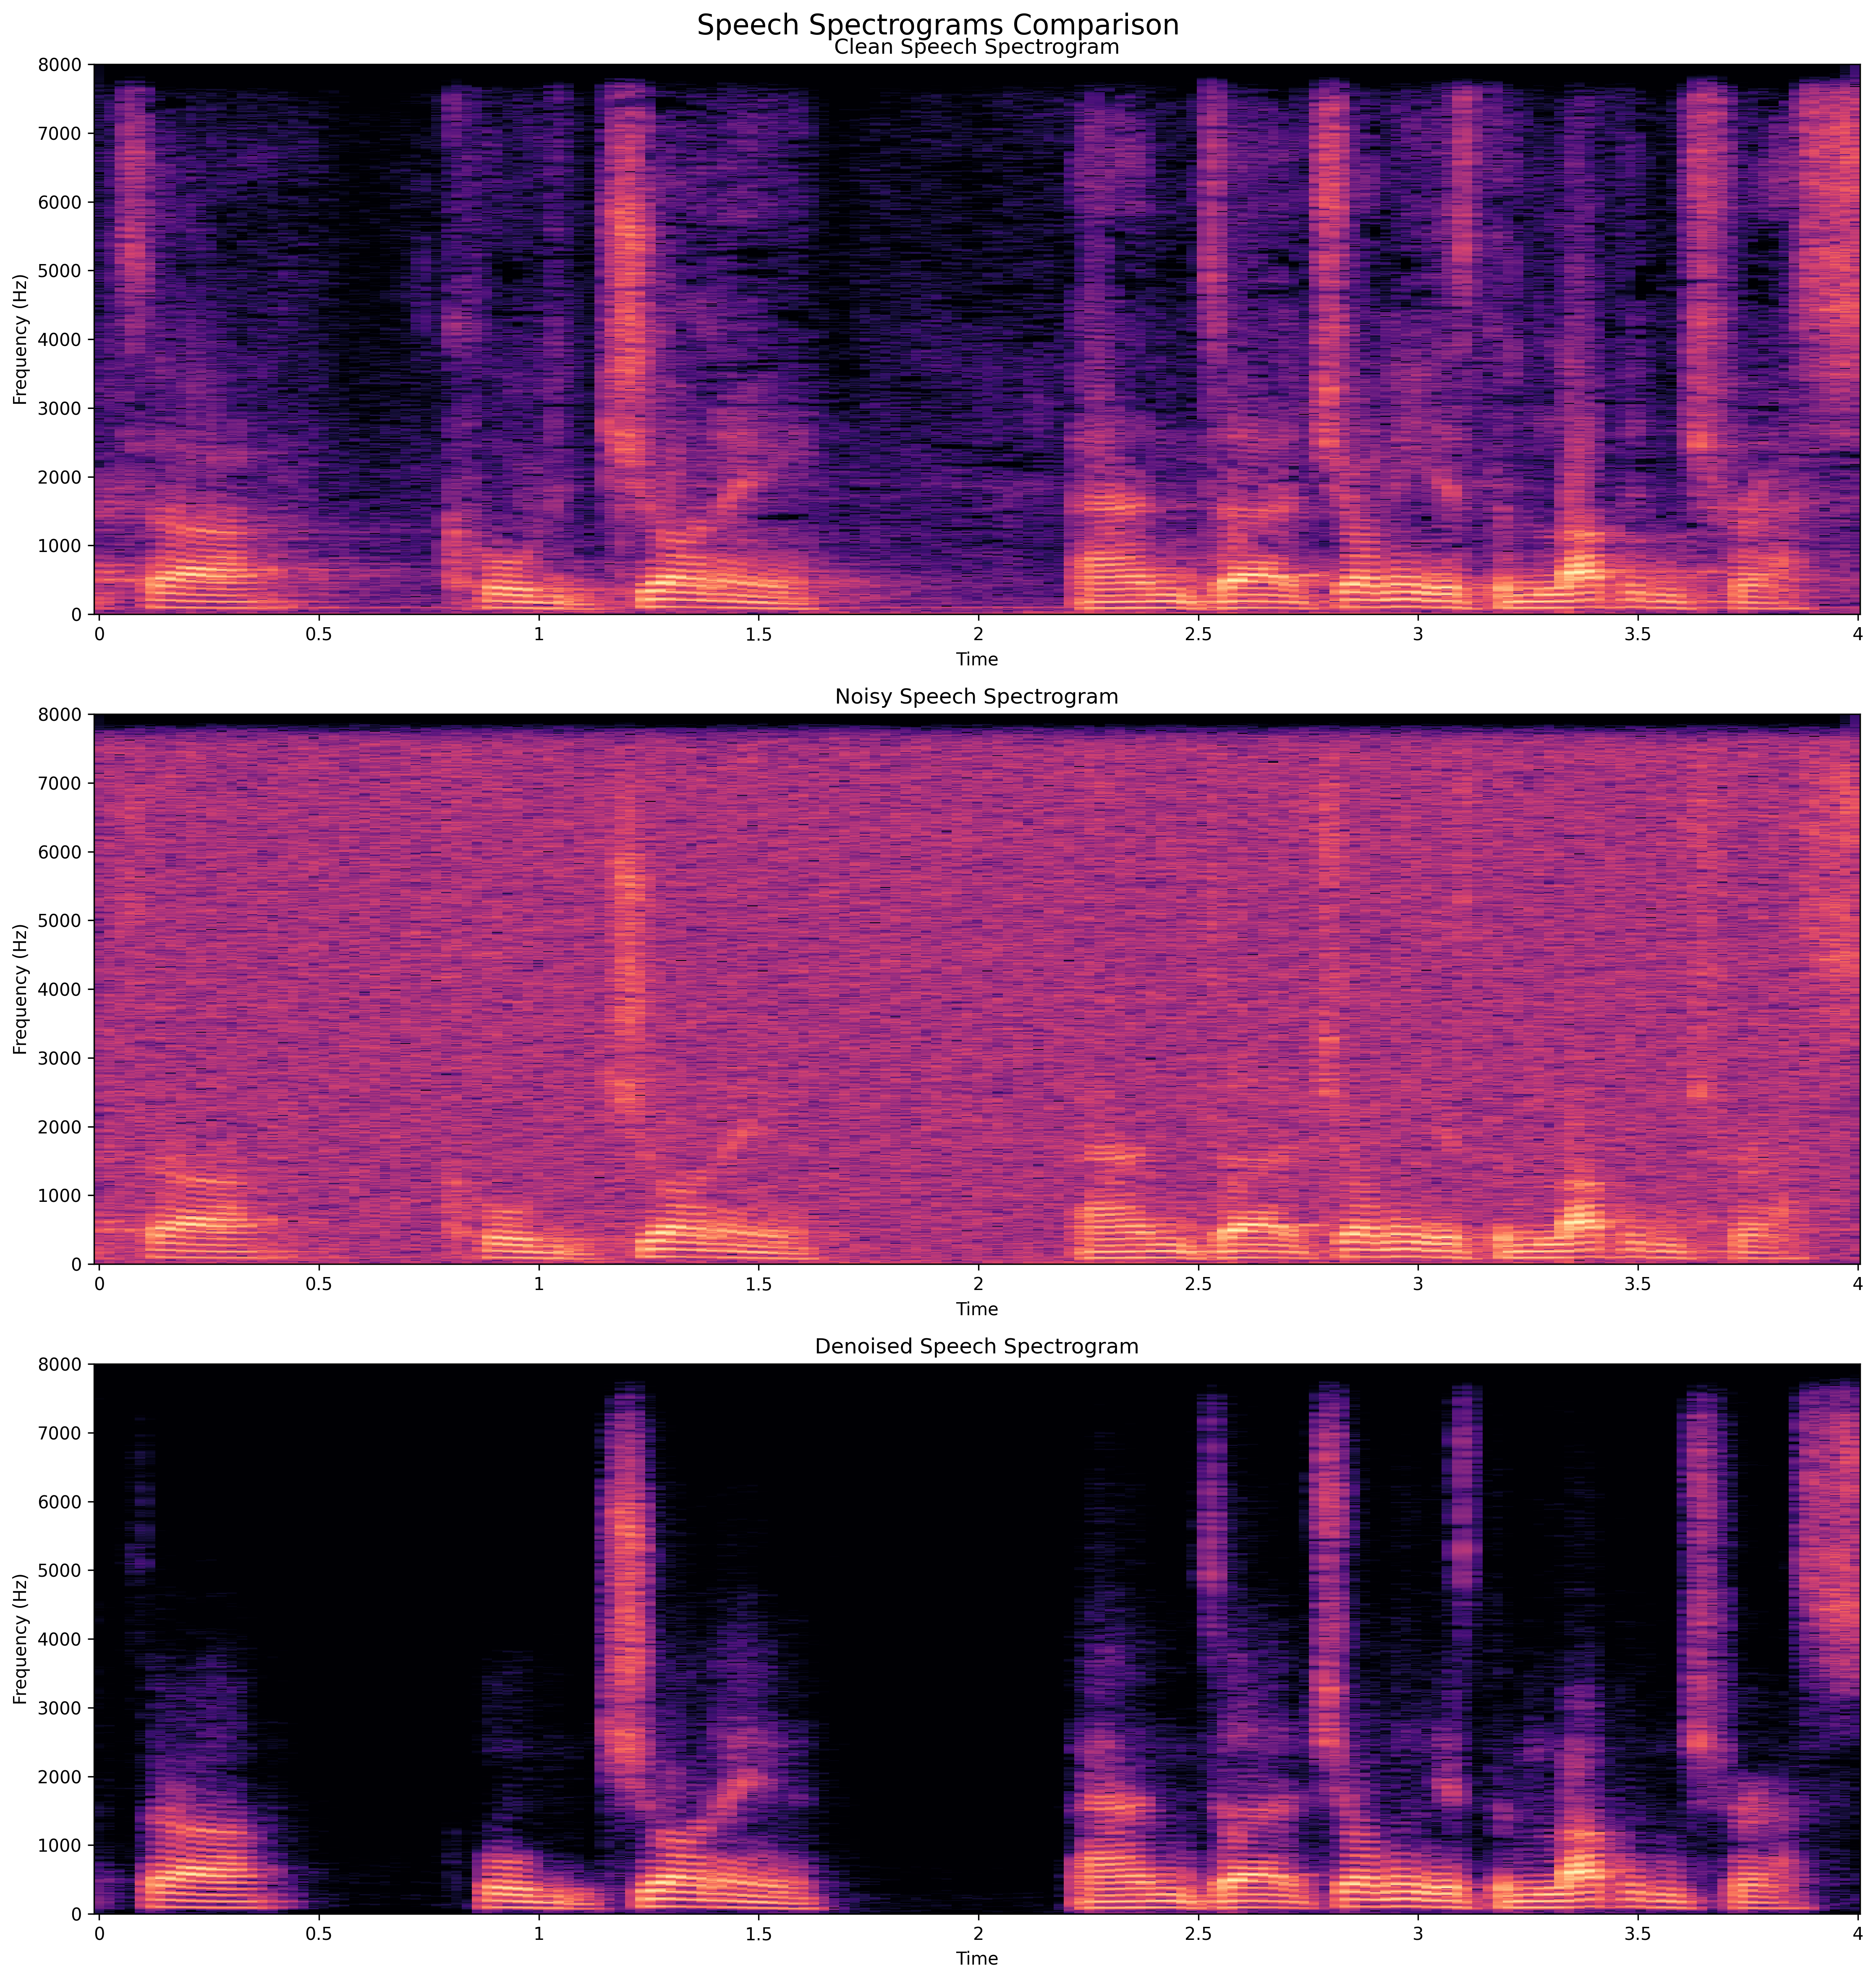

In [19]:
import numpy as np

import matplotlib.pyplot as plt
import librosa.display


# Load audio files and compute spectrograms
def create_spectrogram(audio_path):
    y, sr = librosa.load(audio_path)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    return D, sr


# Create spectrograms
fig, axes = plt.subplots(3, 1, figsize=(15, 16), dpi=300)
fig.suptitle("Speech Spectrograms Comparison", fontsize=16)

# Clean speech
D_clean, sr = create_spectrogram(clean_path)
img = librosa.display.specshow(D_clean, x_axis="time", y_axis="hz", sr=sr, ax=axes[0])
axes[0].set_title("Clean Speech Spectrogram")
axes[0].set_ylabel("Frequency (Hz)")
axes[0].set_ylim(0, 8000)  # Limit y-axis to 8000 Hz for better visibility

# Noisy speech
D_noisy, _ = create_spectrogram(noisy_path)
librosa.display.specshow(D_noisy, x_axis="time", y_axis="hz", sr=sr, ax=axes[1])
axes[1].set_title("Noisy Speech Spectrogram")
axes[1].set_ylabel("Frequency (Hz)")
axes[1].set_ylim(0, 8000)  # Limit y-axis to 8000 Hz for better visibility

# Denoised speech
D_denoised, _ = create_spectrogram(denoised_path)
librosa.display.specshow(D_denoised, x_axis="time", y_axis="hz", sr=sr, ax=axes[2])
axes[2].set_title("Denoised Speech Spectrogram")
axes[2].set_ylabel("Frequency (Hz)")
axes[2].set_ylim(0, 8000)

# Add colorbar
# plt.colorbar(img, ax=axes, format='%+2.0f dB')
plt.tight_layout()

In [20]:
# Create spectrograms
fig, axes = plt.subplots(4, 1, figsize=figsize, dpi=300)

# Clean speech
img = librosa.display.specshow(D_clean, x_axis="time", y_axis="log", sr=sr, ax=axes[0])
axes[0].set_title("Clean Speech Spectrogram")
axes[0].set_ylabel("Frequency (Hz)")

# Noisy speech
librosa.display.specshow(D_noisy, x_axis="time", y_axis="log", sr=sr, ax=axes[1])
axes[1].set_title("Noisy Speech Spectrogram")
axes[1].set_ylabel("Frequency (Hz)")

# Denoised speech
librosa.display.specshow(D_denoised, x_axis="time", y_axis="log", sr=sr, ax=axes[2])
axes[2].set_title("Denoised Speech Spectrogram")
axes[2].set_ylabel("Frequency (Hz)")

# Difference between clean and denoised
difference = D_clean - D_denoised
librosa.display.specshow(difference, x_axis="time", y_axis="log", sr=sr, ax=axes[3], cmap='inferno')
axes[3].set_title("Difference (Clean - Denoised)")
axes[3].set_ylabel("Frequency (Hz)")

plt.tight_layout()
# save to ../figures/deepfilternet3_spectrograms.png
file_path = '../figures/deepfilternet3_spectrograms.png'
os.makedirs(os.path.dirname(file_path), exist_ok=True)
plt.savefig(file_path, bbox_inches='tight')
plt.close()